<a href="https://colab.research.google.com/github/Abhinav200323/Abhinav200323-Working-with-numpy-Matrices/blob/main/Abhinav_baliyan_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
male = np.loadtxt('/content/drive/MyDrive/data science corizo/minor project /malenhanes_adult_male_bmx_2020.csv.csv', delimiter=',', skiprows=1)
female = np.loadtxt('/content/drive/MyDrive/data science corizo/minor project /nhanes_adult_female_bmx_2020.csv.csv', delimiter=',', skiprows=1)
female_df = pd.DataFrame(female, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference'])
male_df = pd.DataFrame(male, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference'])

To visualize the distribution of weights for male and female participants using histograms.

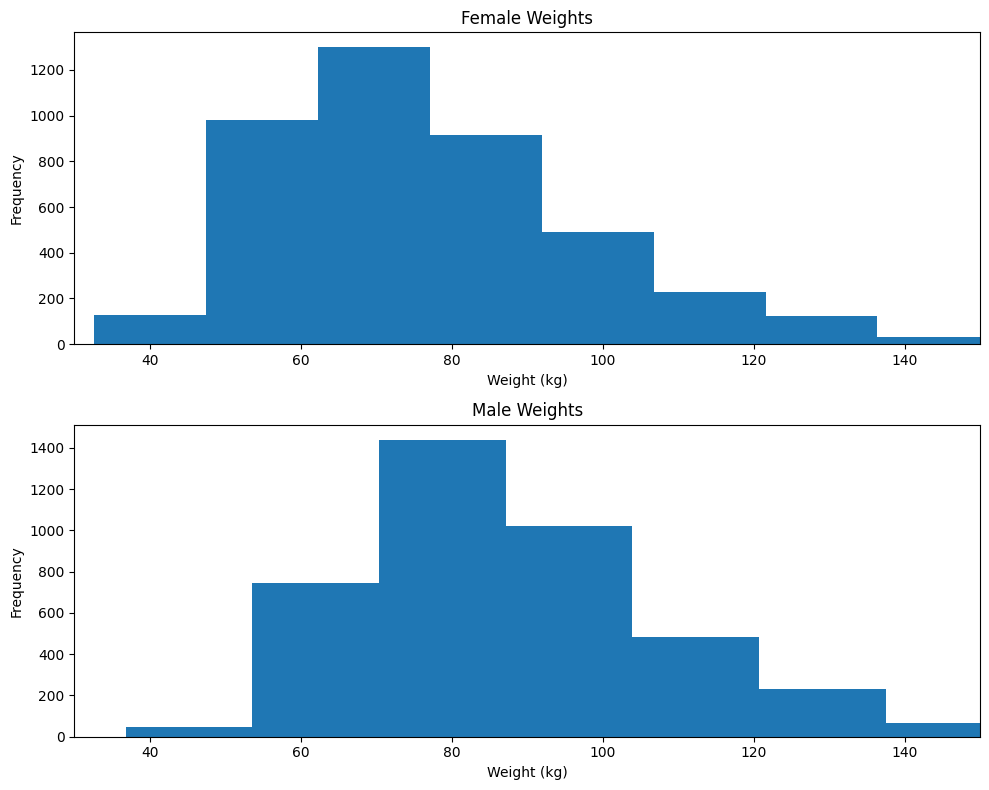

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(female[:, 0])
plt.xlim(30, 150)
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(male[:, 0])
plt.xlim(30, 150)
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms above depict the distribution of weights for female and male participants. The x-axis limits are set identically for both plots to facilitate comparison. The histograms indicate the frequency of various weight ranges within the datasets.


To compare the distributions of weights for male and female participants using a box-and-whisker plot.

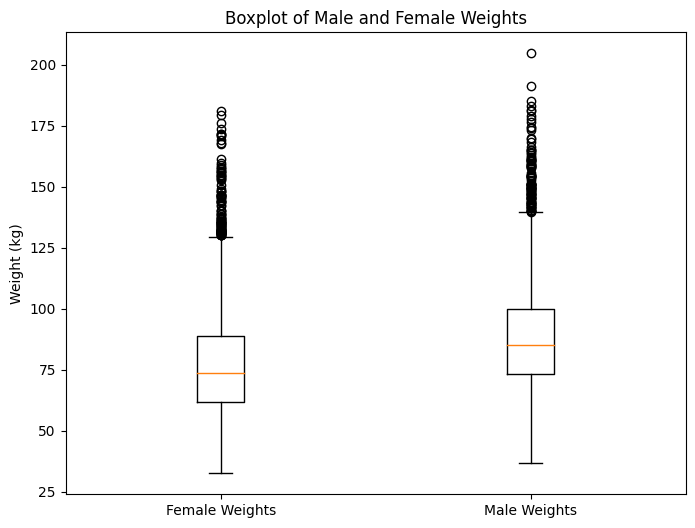

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female Weights', 'Male Weights'])
plt.title('Boxplot of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

In the above box -whisker plot diagram tell us the following-
* The median weight (indicated by the orange line) is higher for males compared to females.
* The IQR, which represents the middle 50% of the data, is also higher for males. This suggests that male weights are generally more spread out around
  the median compared to female weights.
* Both distributions have a similar lower range limit, but the upper range limit is higher for males.
* There are more outliers (indicated by circles) in the male weights compared to female weights, suggesting that there are more exceptionally high
  weights among males.
* In summary, the weights of males tend to be higher and more varied compared to females, with more extreme values present in the male dataset.


                                                                                        

Compute basic statistics (mean, median, standard deviation, skewness) for male and female weights.

In [ ]:
def compute_statistics(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'skewness': stats.skew(data)
    }

female_stats = compute_statistics(female[:, 0])
male_stats = compute_statistics(male[:, 0])

stats_df = pd.DataFrame([female_stats, male_stats], index=['Female', 'Male'])
stats_df

,mean,median,std_dev,skewness
Female,77.403791,73.6,21.542508,1.033361
Male,88.364543,85.0,21.418937,0.984281


Basic statistics computed for male and female weights.
Males shows a higher mean and median, indicating that males generally have higher body weights compared to females in this dataset.

Standard Deviation: The standard deviation for female weights is slightly higher than for male weights, indicating that there is more
variability in the weights of females compared to males

Skewness: Both distributions are positively skewed, meaning there are more individuals with weights below the mean than above it. However,
the skewness is slightly higher for females, suggesting that the female weight distribution has a longer tail on the right side.

Add a BMI column to the female dataset.


In [ ]:
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))

female_df['BMI'] = female_bmi
female_df.head()

,Weight,Height,Upper Arm Length,Upper Leg Length,Arm Circumference,Hip Circumference,Waist Circumference,BMI
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791


BMI column added to the female dataset.
BMI is calculated using the formula: weight (kg) / (height (m))^2.

Create a standardized version of the female dataset using z-scores


In [ ]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

zfemale_df = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])
zfemale_df.head()


,Weight,Height,Upper Arm Length,Upper Leg Length,Arm Circumference,Hip Circumference,Waist Circumference,BMI
0,0.914295,0.008950,-0.567395,1.132988,0.550845,1.083162,1.115785,0.996968
1,0.635776,-1.053068,-1.078931,-1.293492,1.032218,1.044755,0.265089,1.156175
2,-0.204423,0.150553,0.583563,0.261944,-0.162299,-0.190647,-0.372933,-0.259275
3,-0.728968,-0.387537,0.839332,-0.764643,-0.661500,-0.523501,-0.459152,-0.670391
4,-1.021413,-0.784024,-0.610023,-0.982404,-0.786301,-1.067590,-1.453546,-0.892899


z = (x - μ) / σ

where:

z is the z-score
x is the individual data point
μ is the mean of the dataset
σ is the standard deviation of the dataset
This standardizes the data, making each column have a mean of 0 and a standard deviation of 1.

Camparing the Statistics and BMI for the female and zfemale datasets.


Summary Statistics for female_df:
             Weight       Height  Upper Arm Length  Upper Leg Length  \
count  4221.000000  4221.000000       4221.000000       4221.000000   
mean     77.403791   160.136792         36.031035         37.157972   
std      21.545061     7.062859          2.346150          3.214914   
min      32.600000   131.100000         28.500000         25.000000   
25%      61.600000   155.300000         34.400000         35.000000   
50%      73.600000   160.100000         36.000000         37.100000   
75%      88.700000   164.800000         37.500000         39.300000   
max     180.900000   189.300000         46.700000         49.100000   

       Arm Circumference  Hip Circumference  Waist Circumference          BMI  \
count        4221.000000        4221.000000          4221.000000  4221.000000   
mean           32.710329         109.178370            98.488107    30.103379   
std             5.609625          15.624294            17.399588     7.756097   
m

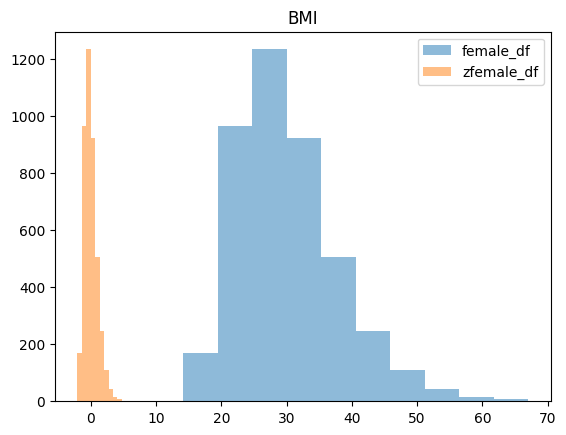

In [ ]:

female_df_summary = female_df.describe()
zfemale_df_summary = zfemale_df.describe()

print("Summary Statistics for female_df:\n", female_df_summary)
print("\nSummary Statistics for zfemale_df:\n", zfemale_df_summary)

import matplotlib.pyplot as plt

plt.figure()
plt.hist(female_df['BMI'], alpha=0.5, label='female_df')
plt.hist(zfemale_df['BMI'], alpha=0.5, label='zfemale_df')
plt.legend()
plt.title('BMI')
plt.show()



The female dataset is standardized. Each column now has a mean of 0 and a standard deviation of 1.
Here's the formula for calculating a z-score:
 z = (data - data(mean))/data(standard deviation)

 Create a scatterplot matrix for standardized height, weight, waist circumference, hip circumference, and BMI of females(based on zfemale)


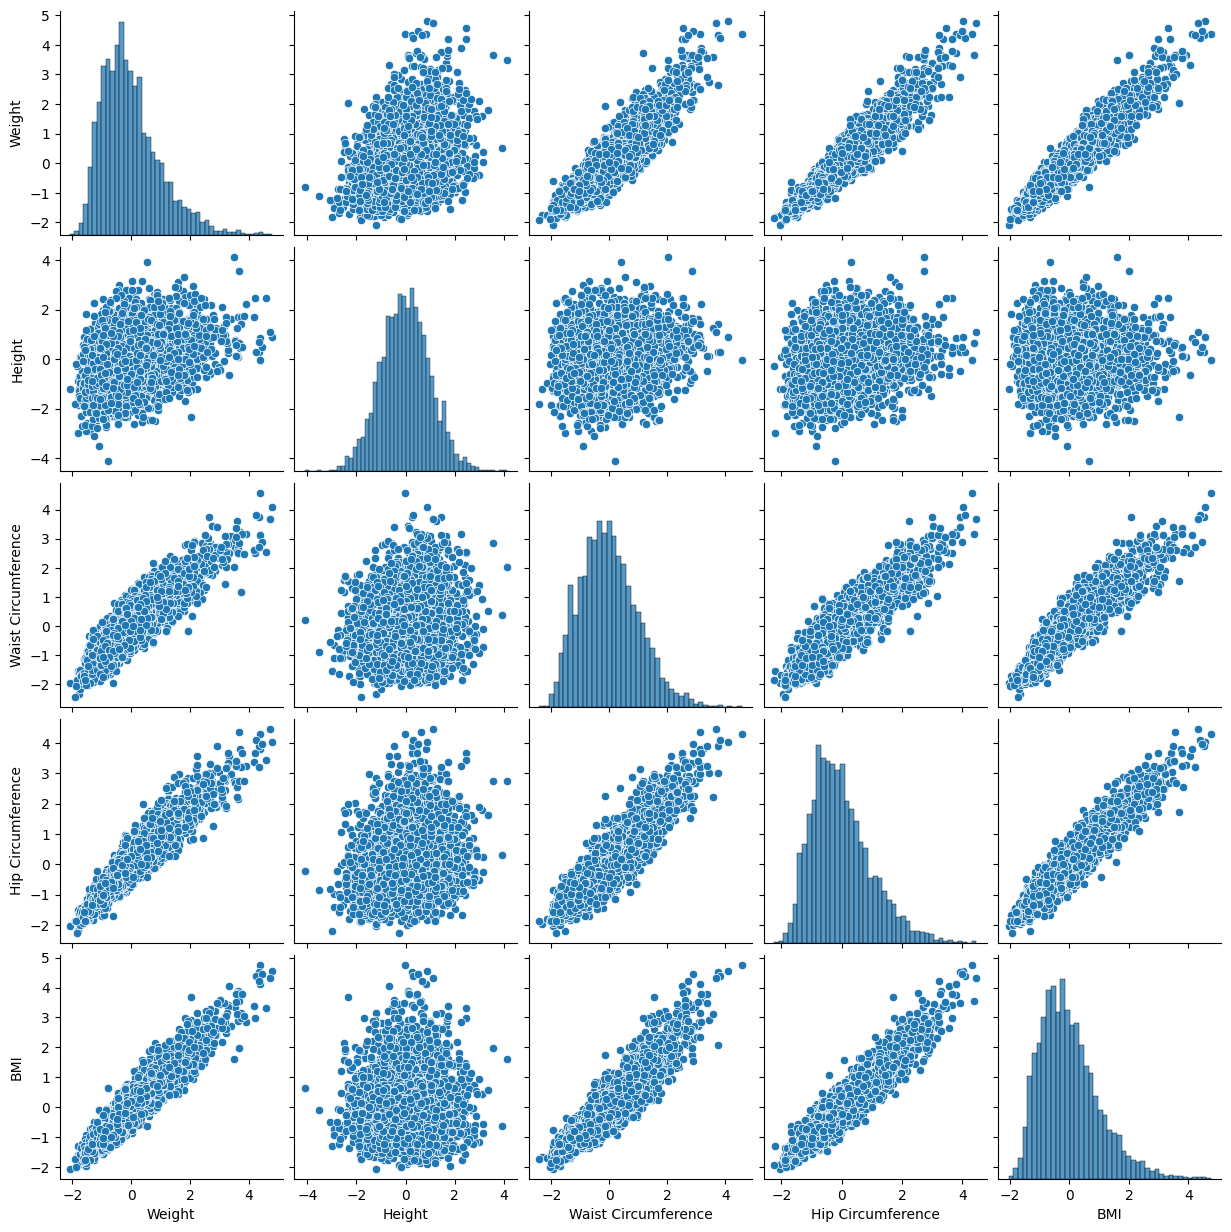

In [ ]:
sns.pairplot(zfemale_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()


The above shows the relationships between standardized variables.

Pearson’s and Spearman’s correlation coefficients for all pairs of variables

In [ ]:
data = female_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']]
pearson_corr = data.corr(method='pearson')

spearman_corr = data.corr(method='spearman')

print("Pearson Correlation Matrix:")
print()
print(pearson_corr)
print()
print("\nSpearman Correlation Matrix:")
print()
print(spearman_corr)


Pearson Correlation Matrix:

                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  


Spearman Correlation Matrix:

                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587             1.00

 Correlation matrices computed using Pearson’s and Spearman’s methods.
 These matrices help understand linear and monotonic relationships between variables.

 Pearson Correlation:
 BMI , Hip Circumference and Waist Circumference shares the strongest linear relation with weight while weak relation with height

Values close to +1 or -1 indicate strong positive or negative linear relationships respectively.
Values close to 0 indicate weak or no linear relationship.

Spearman Correlation:
 BMI , Hip Circumference shares the strongest monotonic relation with weight while weak relation with height

Values close to +1 or -1 indicate strong positive or negative monotonic relationships respectively.
Values close to 0 indicate weak or no monotonic relationship.

waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices

In [ ]:
female_waist_height_ratio = female[:, 6] / female[:, 1]
female_waist_hip_ratio = female[:, 6] / female[:, 5]
female = np.column_stack((female, female_waist_height_ratio, female_waist_hip_ratio))

male_waist_height_ratio = male[:, 6] / male[:, 1]
male_waist_hip_ratio = male[:, 6] / male[:, 5]
male = np.column_stack((male, male_waist_height_ratio, male_waist_hip_ratio))

female_df['Waist-Height Ratio'] = female_waist_height_ratio
female_df['Waist-Hip Ratio'] = female_waist_hip_ratio

male_df['Waist-Height Ratio'] = male_waist_height_ratio
male_df['Waist-Hip Ratio'] = male_waist_hip_ratio

female_df.head(), male_df.head()


(   Weight  Height  Upper Arm Length  Upper Leg Length  Arm Circumference  \
 0    97.1   160.2              34.7              40.8               35.8   
 1    91.1   152.7              33.5              33.0               38.5   
 2    73.0   161.2              37.4              38.0               31.8   
 3    61.7   157.4              38.0              34.7               29.0   
 4    55.4   154.6              34.6              34.0               28.3   
 
    Hip Circumference  Waist Circumference        BMI  Waist-Height Ratio  \
 0              126.1                117.9  37.835041            0.735955   
 1              125.5                103.1  39.069720            0.675180   
 2              106.2                 92.0  28.092655            0.570720   
 3              101.0                 90.5  24.904378            0.574968   
 4               92.5                 73.2  23.178791            0.473480   
 
    Waist-Hip Ratio  
 0         0.934972  
 1         0.821514  
 2    

Waist-to-height and waist-to-hip ratios are computed and added to both male and female datasets.

Create a boxplot to compare waist-to-height and waist-to-hip ratios for both genders.

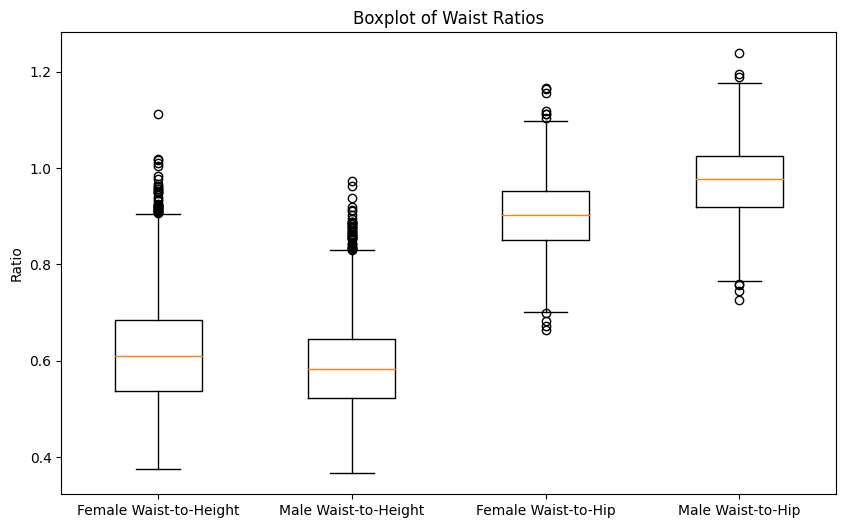

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([female[:, -2], male[:, -2], female[:, -1], male[:, -1]],
            labels=['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip'])
plt.title('Boxplot of Waist Ratios')
plt.ylabel('Ratio')
plt.show()


Female Waist-to-Height Ratio:

Median: The median waist-to-height ratio for females is slightly below 0.6.
Interquartile Range (IQR): The IQR extends roughly from 0.5 to 0.65, indicating the middle 50% of the data.
Whiskers and Outliers: The whiskers extend from approximately 0.4 to 0.9, with several outliers above this range, indicating a significant number of participants with higher waist-to-height ratios.

Male Waist-to-Height Ratio:

Median: The median waist-to-height ratio for males is similar to that of females, slightly below 0.6.
Interquartile Range (IQR): The IQR is also similar, ranging roughly from 0.5 to 0.65.
Whiskers and Outliers: The whiskers extend from approximately 0.4 to 0.9, with several outliers above this range, indicating a similar distribution of waist-to-height ratios as females.

Both males and females have similar distributions in terms of waist-to-height ratios, with medians just below 0.6. This ratio is considered a good indicator of health, with lower values generally being preferable.
The presence of outliers in both distributions indicates that there are individuals with higher waist-to-height ratios, which could be a concern for health

Female Waist-to-Hip Ratio:

Median: The median waist-to-hip ratio for females is approximately 0.85.
Interquartile Range (IQR): The IQR extends from about 0.75 to 0.9, showing the middle 50% of the data.
Whiskers and Outliers: The whiskers extend from around 0.65 to 1.0, with outliers above this range. This indicates a few participants with significantly higher waist-to-hip ratios.

Male Waist-to-Hip Ratio:

Median: The median waist-to-hip ratio for males is slightly higher than females, close to 0.9.
Interquartile Range (IQR): The IQR ranges from about 0.8 to 1.0.
Whiskers and Outliers: The whiskers extend from approximately 0.7 to 1.1, with several outliers. This suggests that males tend to have higher waist-to-hip ratios compared to females.


Males have slightly higher median waist-to-hip ratios compared to females. This ratio is another important health indicator, where higher values can be associated with greater risk of cardiovascular diseases.
The distribution shows that males generally have higher waist-to-hip ratios than females, suggesting potential differences in body composition or fat distribution patterns between genders.


BMI (Body Mass Index):

Advantages:

Easy Calculation: BMI is easy to calculate using a simple formula based on weight and height.
Widely Used: It is widely recognized and used in clinical settings and population studies.
Correlation with Health Risks: BMI correlates reasonably well with overall body fat percentage and health risks associated with obesity.

Disadvantages:

Limited Accuracy: BMI does not distinguish between fat mass and muscle mass, which can lead to misclassification of individuals, especially athletes or those with high muscle mass.
Doesn't Consider Body Composition: It does not account for fat distribution, which is a significant factor in health risks.
Ethnic and Age Variations: BMI may not apply equally well across different ethnicities and age groups.
Waist-to-Height Ratio:

Advantages:

Reflects Central Obesity: It specifically targets abdominal fat, which is more strongly linked to health risks than overall obesity.
Simple Interpretation: Like BMI, it is easy to calculate and interpret, requiring only waist and height measurements.
Better Predictor of Health Risks: Waist-to-height ratio has been suggested to be a better predictor of cardiovascular risk factors compared to BMI.
Disadvantages:

Interpretation Cut-offs: There is no universally agreed-upon cut-off for what constitutes a healthy or unhealthy waist-to-height ratio.
Age and Gender Variations: Cut-off values may vary based on age, gender, and ethnic background.
Doesn't Capture Entire Body Composition: It does not provide information about overall body fat percentage or distribution outside the abdomen.

Waist-to-Hip Ratio:

Advantages:

Focus on Fat Distribution: It focuses on fat distribution around the waist and hips, which is linked to health risks such as cardiovascular disease and diabetes.
Correlates with Health Risks: A higher waist-to-hip ratio is associated with higher risks of chronic diseases.
Can Be Measured Easily: Similar to waist-to-height ratio, it is straightforward to measure using a tape measure.

Disadvantages:

Not Perfect: It does not capture all aspects of body composition or overall body fat percentage.
Variability in Interpretation: Cut-off values for what constitutes a healthy ratio can vary across studies and populations.
Less Used than BMI: It is less commonly used in clinical settings compared to BMI, which may limit its familiarity and applicability in some contexts.

Print standardized measurements for individuals with the lowest and highest BMIs.

In [ ]:
sorted_indices = np.argsort(female[:, 7])
extreme_bmi_indices = np.concatenate([sorted_indices[:5], sorted_indices[-5:]])

extreme_bmi_measurements = zfemale[extreme_bmi_indices]

extreme_bmi_df = pd.DataFrame(extreme_bmi_measurements, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])

extreme_bmi_df


,Weight,Height,Upper Arm Length,Upper Leg Length,Arm Circumference,Hip Circumference,Waist Circumference,BMI
0,-2.079785,-1.222991,-1.547840,-1.169057,-2.194761,-2.040550,-1.942121,-2.050240
1,-1.880180,-0.189293,-1.718352,0.386379,-2.444362,-1.854919,-2.057080,-1.994880
2,-1.536673,1.807302,0.626191,0.573031,-2.266076,-1.675690,-1.706456,-1.970884
3,-1.843044,-0.260094,-0.226370,0.510814,-2.301733,-2.251784,-1.855902,-1.941776
4,-1.610945,0.886886,-0.098486,0.479705,-2.212590,-1.829315,-1.712204,-1.893196
5,4.247240,0.292155,1.862405,-0.982404,2.369364,4.104456,3.817318,4.396492
6,4.456130,0.504559,1.691893,-1.137948,3.349938,3.982836,2.903395,4.462011
7,4.349364,0.277995,2.842851,1.941815,4.366169,3.918826,3.754091,4.514669
8,4.804279,0.886886,2.118174,1.817380,3.777825,4.021242,4.081723,4.542709
9,4.363290,-0.033530,-0.055858,-0.173578,2.779422,4.315691,4.570299,4.762433


The standardized measurements for individuals with the lowest and highest BMIs are presented in a table. This provides insights into how other body measurements vary with extreme BMI values.
0-4 are values with lowest BMI
5-9 are values with highest BMI

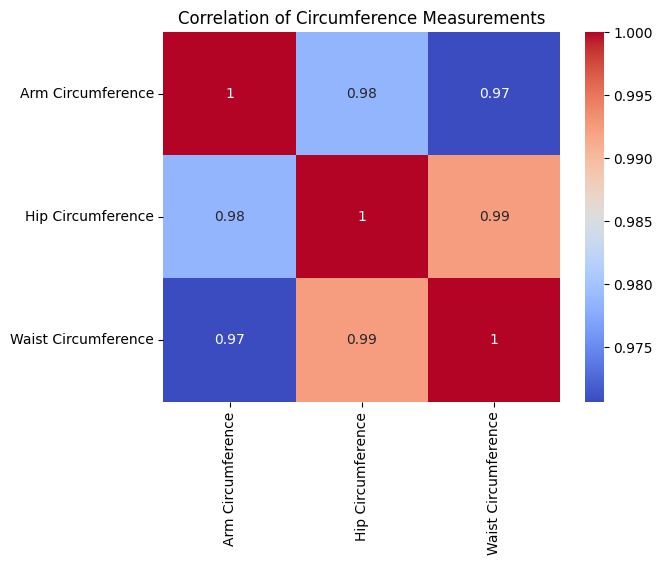

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
corr_matrix = extreme_bmi_df[['Arm Circumference', 'Hip Circumference', 'Waist Circumference']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
_ = plt.title('Correlation of Circumference Measurements')